# 機器學習 - 機器學習簡介(案例)
- 2022 機器學習 Summer Session 教材 (師培中心)<br>
@ 台南應用科技大學 資管系 杜主民

<hr style='border-color:brown; border-width:3px'>

## 一、問題: 針對中古汽車的價格預測
- 中古車零售是車商很受重視的利基型消費市場，市面上有不少網站專門在介紹和經營中古車的交易。假如你關注中古車的行情，想要以機器學習的算法，針對里程數和車齡，判斷中古車在市場上的合理價格。

## 二、化成函數形式
- 上述資料集有 3 個欄位，其中 `Mileage`和`Age`以及`SellPrice`。
- 在此要取用 `Mileage`(里程數)以及`Age`(車齡) 2 個欄位來判斷汽車的價格，這些欄位稱為機器學習的 `features`。
- 而`SellPrice`(售價)是機器學習要學習的目標，稱為 `target`/`label`。
- `Mileage`及`Age`是函數的輸入變數，`SellPrice`是函數的輸出結果。
- 採用 sklearn 套件的線性迴歸模型，。將`Mileage`及`Age`的所有資料列帶入sklearn 機器學習模型的 `fit()`函數訓練。

## 三、收集訓練資料

In [1]:
import numpy as np   # 載入 numpy 套件，給予 np 別名
import pandas as pd  # 載入 pandas 套件，給予 pd 別名
import matplotlib.pyplot as plt  # 載入 matplotlib.pyplot 套件模組，給予 plt 別名
from sklearn.linear_model import LinearRegression  # 載入sklearn套件linear_model模組的LinearRegression函數

In [2]:
#carprice = pd.read_csv('./data/carprices.csv')  # 相對路徑取用 carprices.csv
carprice = pd.read_csv('https://bit.ly/3P2C0cA')  
for column in carprice.columns:
    print(column, end='  ')

Mileage  Age  SellPrice  

In [3]:
carprice.head()

,Mileage,Age,SellPrice
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [4]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)}) # 設定繪圖區的大小

           Mileage   Age  SellPrice
Mileage       1.00  0.97      -0.97
Age           0.97  1.00      -0.94
SellPrice    -0.97 -0.94       1.00


<AxesSubplot:>

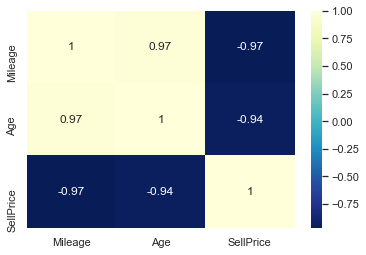

In [5]:
# 各欄位的相關係數 (Correlation)
correlation_matrix = carprice.corr().round(2)
print(correlation_matrix)
# annot = True 讓我們可以把數字標進每個格子裡

sns.heatmap(data=correlation_matrix, cmap="YlGnBu_r", annot=True)

### SellPrice 與 Mileage (里程數)呈現高度負相關，與 Age (車齡) 也同樣呈現高度負相關。

Text(0, 0.5, 'SellPrice')

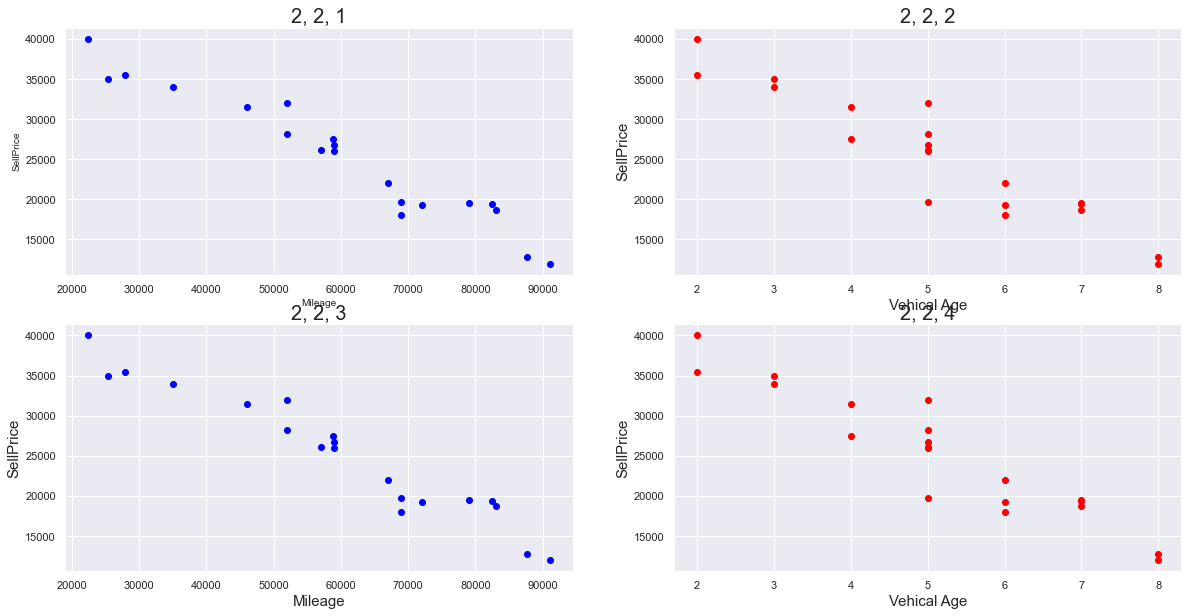

In [6]:
#plt.figure(figsize=(20, 10))
plt.rcParams['figure.figsize']=[20, 10]
plt.subplot(2, 2, 1)
x = carprice['Mileage']    # 取出 Mileage 當成 x
y = carprice['SellPrice']  # 取出 SellPrice 當成 y
plt.scatter(x, y, c='blue') # 散布圖
plt.title('2, 2, 1', fontsize=20)
plt.xlabel('Mileage', fontsize=10)
plt.ylabel('SellPrice', fontsize=10)

plt.subplot(2, 2, 2)
x = carprice['Age']        # 取出 Age 當成 x
y = carprice['SellPrice']  # 取出 SellPrice 當成 y
plt.scatter(x, y, c='red') # 散布圖
plt.title('2, 2, 2', fontsize=20)
plt.xlabel('Vehical Age', fontsize=15)
plt.ylabel('SellPrice', fontsize=15)

plt.subplot(2, 2, 3)
x = carprice['Mileage']    # 取出 Mileage 當成 x
y = carprice['SellPrice']  # 取出 SellPrice 當成 y
plt.scatter(x, y, c='blue') # 散布圖
plt.title('2, 2, 3', fontsize=20)
plt.xlabel('Mileage', fontsize=15)
plt.ylabel('SellPrice', fontsize=15)

plt.subplot(2, 2, 4)
x = carprice['Age']        # 取出 Age 當成 x
y = carprice['SellPrice']  # 取出 SellPrice 當成 y
plt.scatter(x, y, c='red') # 散布圖
plt.title('2, 2, 4', fontsize=20)
plt.xlabel('Vehical Age', fontsize=15)
plt.ylabel('SellPrice', fontsize=15)

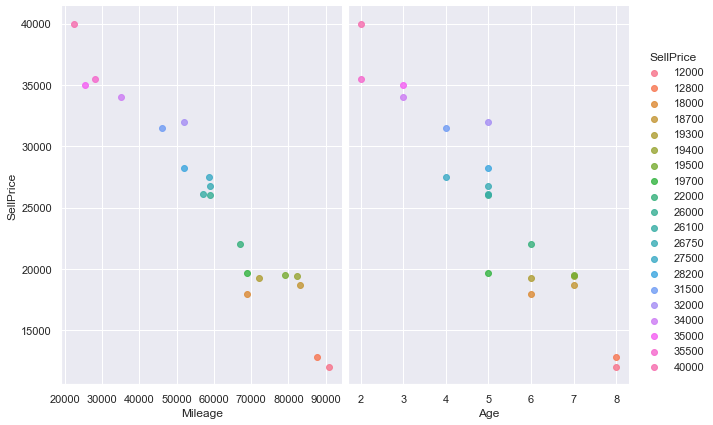

In [7]:
sns.pairplot(carprice, x_vars=['Mileage', 'Age'], y_vars='SellPrice', height=6, aspect=0.75, kind='reg', hue='SellPrice')

## 四、建立函數學習機

In [8]:
# 載入 scikit-learn 套件模型
from sklearn.linear_model import LinearRegression  

# 建立迴歸模型物件變數
reg = LinearRegression() 

## 五、訓練函數學習機

In [9]:
# 將資料分割為特徵自變數 X 和目標因變量 y 
X = carprice[['Mileage','Age']]  # 二維資料
y = carprice['SellPrice']        # 一維資料

In [14]:
# 將資料進行訓練
reg.fit(X, y)

LinearRegression()

In [15]:
# 顯示訓練結果
print(np.round(reg.intercept_, 3))  # 截距
print(np.round(reg.coef_, 3))       # 斜率

47223.349
[-3.38000e-01 -3.52792e+02]


- 得出結果: `SellPrice = 47223.349 ＋ (-0.338)*Mileage + (-352.792)*Age`

### 前述的 Mileage 和 Age 自變數，以及因變數 SellPrice 的關係可以寫成:
### $SellPrice = w_0 + w_1 \times Mileage + w_2 \times Age + error$
### 因應訓練結果改寫為:
### $SellPrice = 47223.349 + (-0.338) \times Mileage + (-352.792) \times Age + error$

### 說明:
#### 當 Mileage(里程數)每增加 1 個單位，在 Age (車齡)變數保持不變的情況下，SellPrice(價格)會大約下降 -0.338 個 Unit(單位)。
#### 當 Age (車齡)每增加 1 個單位，在 Mileage(里程數變數)保持不變的情況下，SellPrice(價格)會大約下降 -352.792 個 Unit(單位)。

## 六、預測結果
### 如果有一輛車的里程數是 950000 miles，車齡是11.5 年，請問此輛中古車的售價大約是多少錢?

In [16]:
result1 = reg.predict([[95000, 11.5]])
print(f'大約是 {np.round(result1, 2)}美金')

大約是 [11027.56]美金


### 如果里程數是 950001 miles (多一英哩)，車齡一樣是11.5 年，請問此輛中古車的售價大約是多少錢? 相差多少錢? 

In [17]:
result2 = reg.predict([[95001, 11.5]]) # 里程數是 950001 miles
print(f'大約是 {np.round(result2, 2)}美金')
print(f'相差 {result1 - result2} 元')

大約是 [11027.22]美金
相差 [0.33830188] 元


### 如果里程數不變，車齡多了 1 年成為 12.5 年，請問此輛中古車的售價大約是多少錢? 相差多少錢? 

In [18]:
result3 = reg.predict([[95000, 12.5]])  # 車齡多了 1 年
print(f'大約是 {np.round(result3, 2)}美金')
print(f'相差 {result1 - result3} 元')

大約是 [10674.77]美金
相差 [352.79201205] 元


### 如果里程數不變，車齡多了 2 年成為 13.5 年，請問此輛中古車的售價大約是多少錢? 相差多少錢? 

In [19]:
result4 = reg.predict([[95000, 13.5]])  # 車齡多了 1 年
print(f'大約是 {np.round(result4, 2)}美金')
print(f'相差 {result1 - result4} 元')

大約是 [10321.98]美金
相差 [705.58402409] 元


<hr style='border-color:brown; border-width:3px'>

## 一、問題: 針對房價的預測

### 載入套件 & 資料集

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.datasets import load_boston

In [21]:
# 載入資料
boston_dataset = load_boston()

# 資料集像json格式，檢查資料集的 keys
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
# 資料集描述
print(boston_dataset.DESCR)

- CRIM :每個城鎮的人均犯罪率 (per capita crime rate by town)
- ZN : 佔地25,000平方英尺以上的住宅區域比例(proportion of residential land zoned for lots over 25,000 sq.ft.)
- INDUS : 每個城鎮非零售業的營業面積比例(proportion of non-retail business acres per town)
- CHAS : 是否靠近河邊(Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))
- NOX : 一氧化氮濃度（ppm)(nitric oxides concentration (parts per 10 million))
- RM : 每個住宅的平均房間數(average number of rooms per dwelling)
- AGE : 1940年前私有住宅的住房比率(proportion of owner-occupied units built prior to 1940)
- DIS : 與五個波士頓就業中心的加權距離(weighted distances to five Boston employment centres)
- RAD : 徑向公路的通達指數(index of accessibility to radial highways)
- TAX : 每10,000美元的所需繳的財產稅(full-value property-tax rate per 10,000)
- PTRATIO : 每個城鎮的師生比例(pupil-teacher ratio by town)
- B : 黑人比例(值為$1000(Bk-0.63)^2$ where Bk is the proportion of blacks by town)
- LSTAT : 中下階級的比率(% lower status of the population)

### target (目標變數) 是 MEDIV (波士頓房價的中位數)

In [ ]:
#column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#boston = pd.read_csv('./data/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [27]:
# 把資料轉換成pd.DataFrame
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# 新增 target 欄位 MEDV
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 檢查遺漏值 NaN
boston.isnull().sum(axis=0)

In [30]:
pd.options.mode.chained_assignment = None  # default='warn' 不要顯示警示說明

In [31]:
# 資料探索
# 用seaborn一次把圖表的美化格式設定好，這裡是只有先設定圖表長寬
sns.set(rc={'figure.figsize':(10,10)})

# 使用的資料是房價MEDIV
#sns.distplot(boston['MEDV'])

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

<AxesSubplot:>

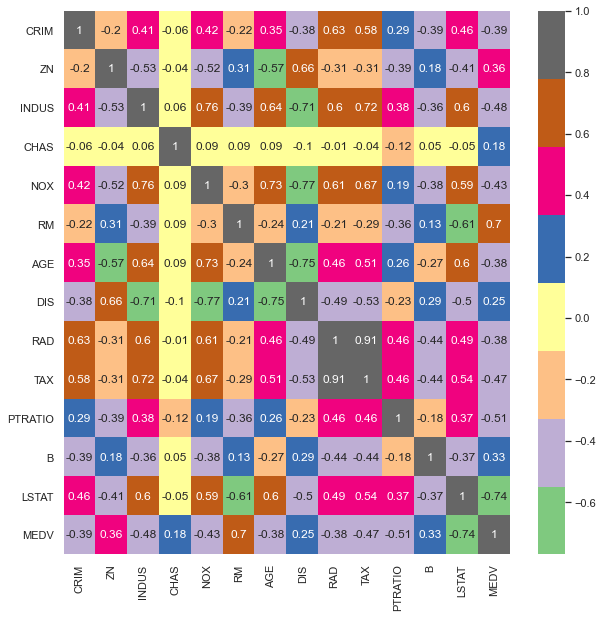

In [32]:
# 各欄位的相關係數 (Correlation)
correlation_matrix = boston.corr().round(2)
print(correlation_matrix)

# annot = True 讓我們可以把數字標進每個格子裡
sns.heatmap(data=correlation_matrix, cmap="Accent", annot=True)

### MDEV 與 RM (房間數量)呈現高度相關，與 LSTAT (中低收入戶佔當地居住人口比例) 呈現負相關。

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
x = boston['MEDV']
y = boston['LSTAT']
plt.scatter(x, y, c='b')
plt.title('LSTAT')
plt.xlabel('MEDV')
plt.ylabel('LSTAT')

plt.subplot(1, 2, 2)
x = boston['MEDV']
y = boston['RM']
plt.scatter(x, y, c='r')
plt.title('RM')
plt.xlabel('MEDV')
plt.ylabel('RM')

### MDEV 與 B (黑人比例)呈現正相關，與 CRIM (犯罪率) 呈現負相關。
- 在初步分析的時候，我們推測黑人比率越高房價會越低，顯然對波士頓的房價不適用。

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
x = boston['MEDV']
y = boston['B']
plt.scatter(x, y, c='b')
plt.title('Black People')
plt.xlabel('MEDV')
plt.ylabel('Black People')

plt.subplot(1, 2, 2)
x = boston['MEDV']
y = boston['CRIM']
plt.scatter(x, y, c='r')
plt.title('CRIM')
plt.xlabel('MEDV')
plt.ylabel('CRIM')

In [ ]:
sns.pairplot(boston, x_vars=['RM','LSTAT','B','CRIM'], y_vars='MEDV', height=6, aspect=0.5, kind='reg')

In [ ]:
sns.pairplot(boston, x_vars=['INDUS','CHAS','NOX'], y_vars='MEDV', height=6, aspect=0.7, kind='reg')

## 二、化成函數形式
- Boston 資料集共有 13 個 features，1 個 target。
- 決定取用 RM (房間數量)、LSTAT (中低收入戶佔當地居住人口比例)、 B (黑人比例)與 CRIM (犯罪率)等 4 個欄位當成機器學習的 features。
- 採用 sklearn 的線性迴歸模型。將上述 4 個 features 的所有資料列帶入，以 sklearn 機器學習模型的 `fit()`函數訓練。

## 三、收集訓練資料

In [ ]:
# 把資料轉換成pd.DataFrame
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# 新增 target 欄位 MEDV
boston['MEDV'] = boston_dataset.target
boston.head()

## 四、建立函數學習機

In [33]:
# 建立迴歸模型(Regression Model)學習機
from sklearn.linear_model import LinearRegression  # 載入 scikit-leart 套件模型

# 建立迴歸模型物件變數
reg_bos = LinearRegression() 

## 五、訓練函數學習機

In [34]:
X = boston[['RM','LSTAT','B','CRIM']]
y = boston['MEDV']

In [37]:
print(X.shape)
print(y.shape)

(506, 4)
(506,)


In [38]:
# 分隔訓練資料和測試資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [57]:
X_test.head(3)

,RM,LSTAT,B,CRIM
8,5.631,29.93,386.63,0.21124
289,6.565,9.51,371.72,0.04297
68,5.594,13.09,396.90,0.13554


In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 4)
(152, 4)
(354,)
(152,)


In [40]:
# 將資料進行訓練
reg_bos.fit(X_train, y_train)

LinearRegression()

In [41]:
# 顯示截距與斜率
print(np.round(reg_bos.intercept_, 3))  # 截距
print(np.round(reg_bos.coef_, 3))       # 各個 feature 的斜率

-5.783
[ 5.075 -0.525  0.009 -0.075]


### 前述的 RM, LSTAT, B, CRIM 自變數，以及因變數 MEDV 的關係可以寫成:
### $MEDV = w_0 + w_1 \times RM + w_2 \times LSTAT + w_3 \times B + w_4 \times CRIM + error$
### 因應訓練結果改寫為:
### $MEDV = -5.783 ＋ 5.075\times RM + (-0.525)\times LSTAT + 0.009*B + -0.075\times CRIM + error$

#### 說明:
- 當 RM(房間數量)每增加 1 個單位，在其它變數保持不變的情況下，MDEV(房價)會大約上升 5.075 個 Unit(單位)。
- 當 LSTAT(中低收入戶比例)每增加 1 個單位，在其它變數保持不變的情況下，MDEV(房價)會大約下降 0.525 個 Unit(單位)。
- 當 B(黑人比例)每增加 1 個單位，在其它變數保持不變的情況下，MDEV(房價)會大約上升 0.009 個 Unit(單位) (<font color='red'>PS: 和一般的刻板印象不同!</font>)。
- 當 CRIM(犯罪率)每增加 1 個單位，在其它變數保持不變的情況下，MDEV(房價)會大約下降 0.075 個 Unit(單位)。

In [42]:
print(X.B.mean())
print(X.B.quantile(0.5))
print(X.B.quantile(0.25))
print(X.B.quantile(0.1))

356.67403162055257
391.44
375.3775
290.27


In [43]:
print(X.LSTAT.max())
print(X.LSTAT.min())
print(X.LSTAT.mean())
print(X.LSTAT.quantile(0.25))
print('-'*30)
print(X.CRIM.max())
print(X.CRIM.min())
print(X.CRIM.mean())

37.97
1.73
12.653063241106723
6.949999999999999
------------------------------
88.9762
0.00632
3.6135235573122535


## 六、預測結果

In [44]:
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


### 如果有一戶人家，想搬遷到 Boston，他們想要找一棟房子，條件是此房屋有 5 個房間；中低收入戶佔當地居住人口比例約 25%；黑人族群比例也佔人口比例大約25%；而犯罪率是 20%，請預估在 Boston 符合此條件的房屋，價格大約多少錢?

In [45]:
# 房屋有 5 個房間
Room = 5

# 低收入戶佔當地居住人口比例約 1/4
LSTAT_quarter = np.round(boston.LSTAT.quantile(0.25), 3)

# 黑人族群比例也大約1/4
B_quarter = np.round(boston.B.quantile(0.25), 3)

# 犯罪率是 1/5
CRIM_pt2 = np.round(boston.CRIM.quantile(0.2), 3)

print(f'低收入戶佔當地居住人口比例約1/4: {LSTAT_quarter}')
print(f'黑人族群比例約1/4: {B_quarter}')
print(f'犯罪率是 1/5: {CRIM_pt2}')

低收入戶佔當地居住人口比例約1/4: 6.95
黑人族群比例約1/4: 375.378
犯罪率是 1/5: 0.064


### 使用 RM (房間數量)、LSTAT (中低收入戶佔當地居住人口比例)、 B (黑人比例)與 CRIM (犯罪率)等 4 個欄位，藉由多元線性迴歸預測 MEDV（房價）。

In [46]:
result = reg_bos.predict([[Room, LSTAT_quarter, B_quarter, CRIM_pt2]])
print(f'元線性迴歸預測的結果，符合條件上述 4 個條件的房價大約是{np.round(result[0]*10000, 2)} 元')

元線性迴歸預測的結果，符合條件上述 4 個條件的房價大約是193028.35 元


### 在其它條件都不變的情況下，將房間數量改為 6 間，請問 MDEV(房價) 會相差多少錢?

In [47]:
result2 = reg_bos.predict([[6, LSTAT_quarter, B_quarter, CRIM_pt2]])
print(f'元線性迴歸預測的結果，符合條件上述 4 個條件的房價大約是{np.round(result2[0]*10000, 2)} 元')

元線性迴歸預測的結果，符合條件上述 4 個條件的房價大約是243775.96 元


In [48]:
print(f'6 間房間房價減去 5 間房間的房價，大約= {(result2 - result)*10000} 元')

6 間房間房價減去 5 間房間的房價，大約= [50747.60317404] 元


### 在其它條件都不變的情況下，將 LSTAT 增加為 1，請問 MDEV(房價) 會相差多少錢?

In [50]:
result3 = reg_bos.predict([[Room, LSTAT_quarter+1, B_quarter, CRIM_pt2]])
print(f'元線性迴歸預測的結果，符合條件上述 4 個條件的房價大約是{np.round(result3[0]*10000, 2)} 元')

元線性迴歸預測的結果，符合條件上述 4 個條件的房價大約是187778.39 元


In [51]:
print(result3 - result)
print(f'LSTAT 增加為 1.25，房價大約相差 {(result3 - result)*10000} 元')

[-0.52499604]
LSTAT 增加為 1.25，房價大約相差 [-5249.96035308] 元


### 檢驗資料的可信度 - 決定係數(Coefficient of Determination) $R^2$
- 決定係數經常在統計學使用的，意謂著當兩個連續型變數 𝑥 和 𝑦  執行迴歸分析之後，兩者在迴歸線的擬合 (fit) 程度。

#### $R^2$有兩個函數可以選擇: 
1. 使用的 sklearn LinerRegression 的 `score()` 函式。
2. 使用的 sklearn metrics import r2_score 的 `r2_score()` 函數。

In [ ]:
# 使用的 reg.score() 函式是 regression 物件
r_squared = reg_bos.score(X_test, y_test) # R square
print('r_squared: ', r_squared)

#### $R^2$ 可以讓我們知道特徵變數對於目標變數的解釋程度為何，其值越接近1代表越準確。這裡大約是66.3%，解釋程度算還算可以接受。

# 3 D 視覺圖形參考作法

#### 互動功能必須使用 matplotlib 的 `mpl_toolkits` 模組
- 需要使用 mpl_toolkits.mplot3d 模組的 Axes3D 函數
- 安裝 matplotlib 時應該會一起安裝此 toolkit
- Add `%matplotlib widget`, it is a Jupyter magic widget and used to tell jupyter to use interactive backend for plot. 

- Reference<a href='https://pythonprogramming.net/3d-graphs-matplotlib-tutorial/'>3D graphs</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# carprice = pd.read_csv('./data/carprices.csv')
carprice = pd.read_csv('https://bit.ly/3P2C0cA')

In [4]:
carprice

,Mileage,Age,SellPrice
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


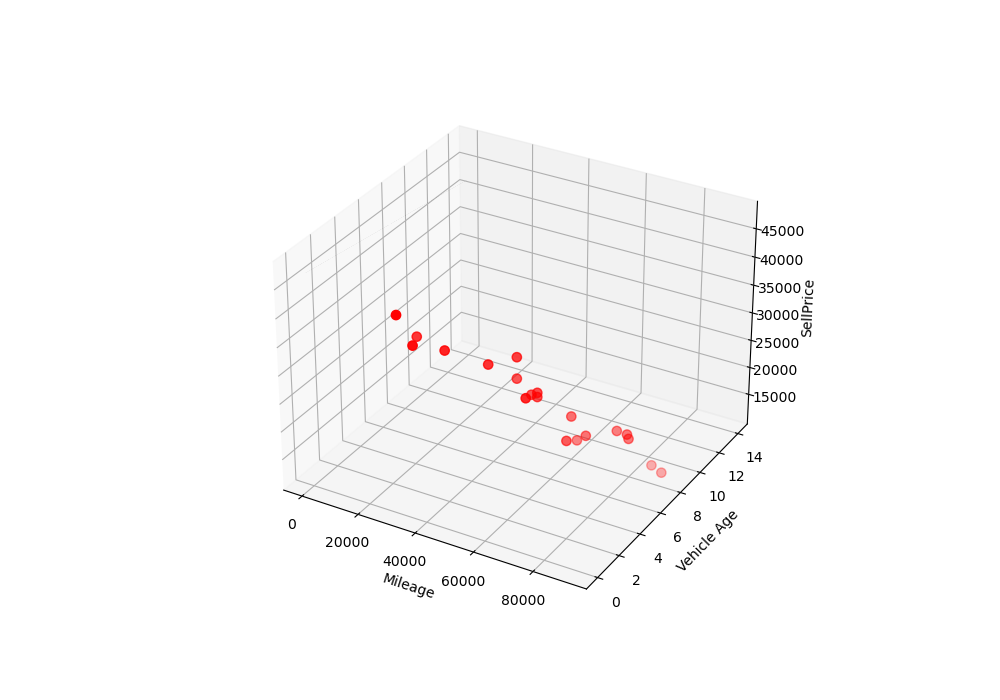

In [3]:
%matplotlib widget
from sklearn.linear_model import LinearRegression  
plt.rcParams['figure.figsize']=[10,7]

reg = LinearRegression() 

X = carprice[['Mileage','Age']]
y = carprice['SellPrice']

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], y, color='red',s=45)
ax.set_xlabel("Mileage")
ax.set_ylabel("Vehicle Age")
ax.set_zlabel("SellPrice")

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
          
coefs = model.coef_
intercept = model.intercept_
xs = np.tile(np.arange(15), (15,1))
ys = np.tile(np.arange(15), (15,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept

ax.plot_surface(xs,ys,zs, alpha=0.5)

### 另一個 3D 切面範例

MAE: 325.8983449622598
RMSE: 406.10020820485755
Equation: y = -1222.10 + 60.90x1 + 59.69x2
截距=-1222.1
斜率=[60.9  59.69]


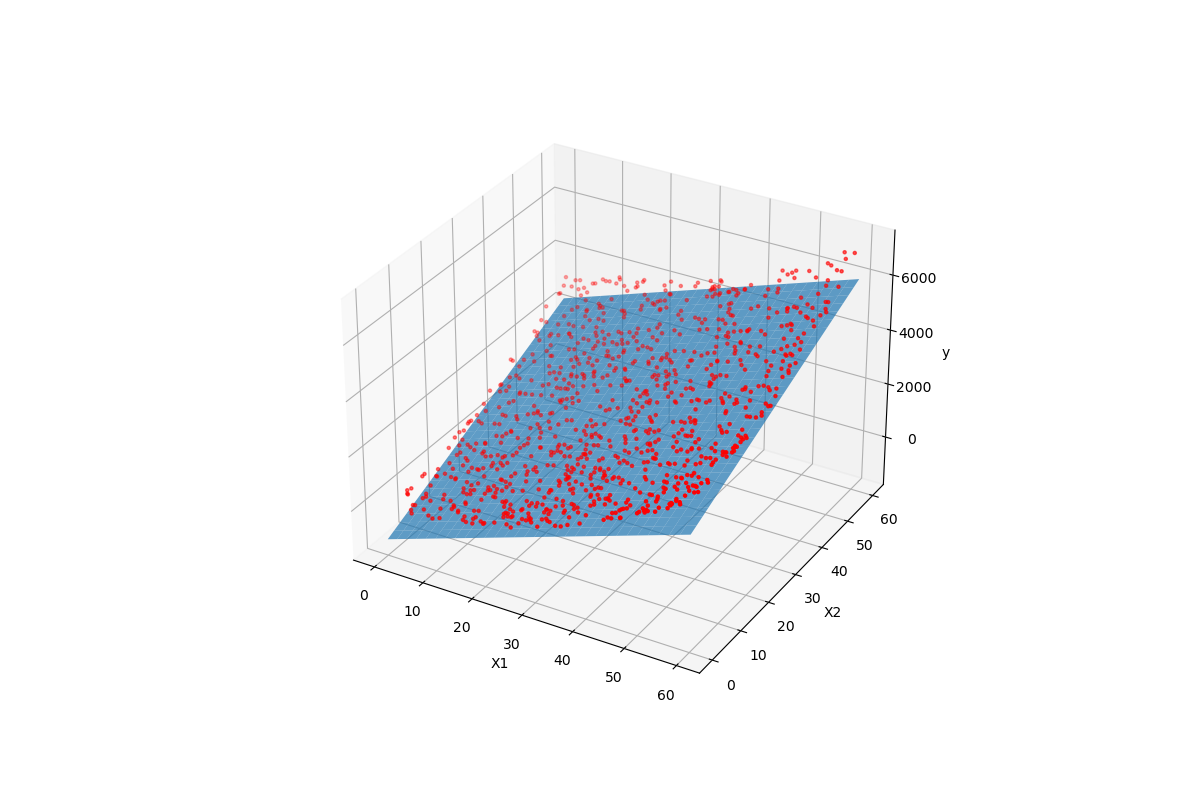

In [4]:
from matplotlib import animation
%matplotlib widget
plt.rcParams['figure.figsize']=[12,8]
X_train = np.random.rand(2000).reshape(1000,2)*60
y_train = (X_train[:, 0]**2)+(X_train[:, 1]**2)
X_test = np.random.rand(200).reshape(100,2)*60
y_test = (X_test[:, 0]**2)+(X_test[:, 1]**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

coefs = model.coef_
intercept = model.intercept_
xs = np.tile(np.arange(61), (61,1))
ys = np.tile(np.arange(61), (61,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],
                                                         coefs[1]))
print(f'截距={np.round(model.intercept_,2)}')
print(f'斜率={np.round(model.coef_,2)}')

ax.plot_surface(xs,ys,zs, alpha=0.7)

#def rotate(angle): #
#     ax.view_init(azim=angle)#

#angle = 3#
#ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=100)#
#ani.save('./images/rotation.gif', writer=animation.PillowWriter(fps=30))#

#ani.save('./images/rotation.gif', writer=animation.PillowWriter(fps=20))

Text(0.5, 0, 'Z')

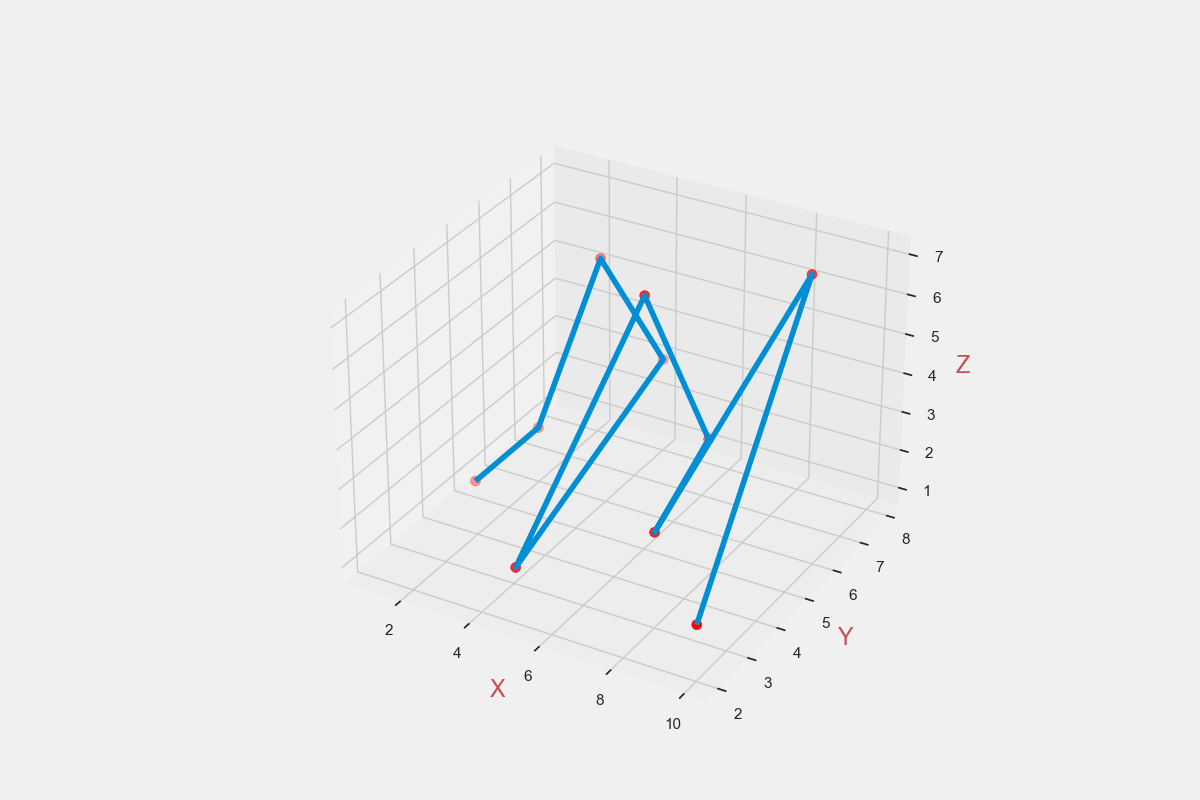

In [49]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([5,6,7,8,2,5,6,3,7,2])
z = np.array([[1,2,6,3,2,7,3,3,7,2]])

ax.scatter(x, y, z, s=50, color='red')

ax.plot_wireframe(x,y,z)

ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='r')
ax.set_zlabel("Z", color='r')

Text(0.5, 0, 'z-axis')

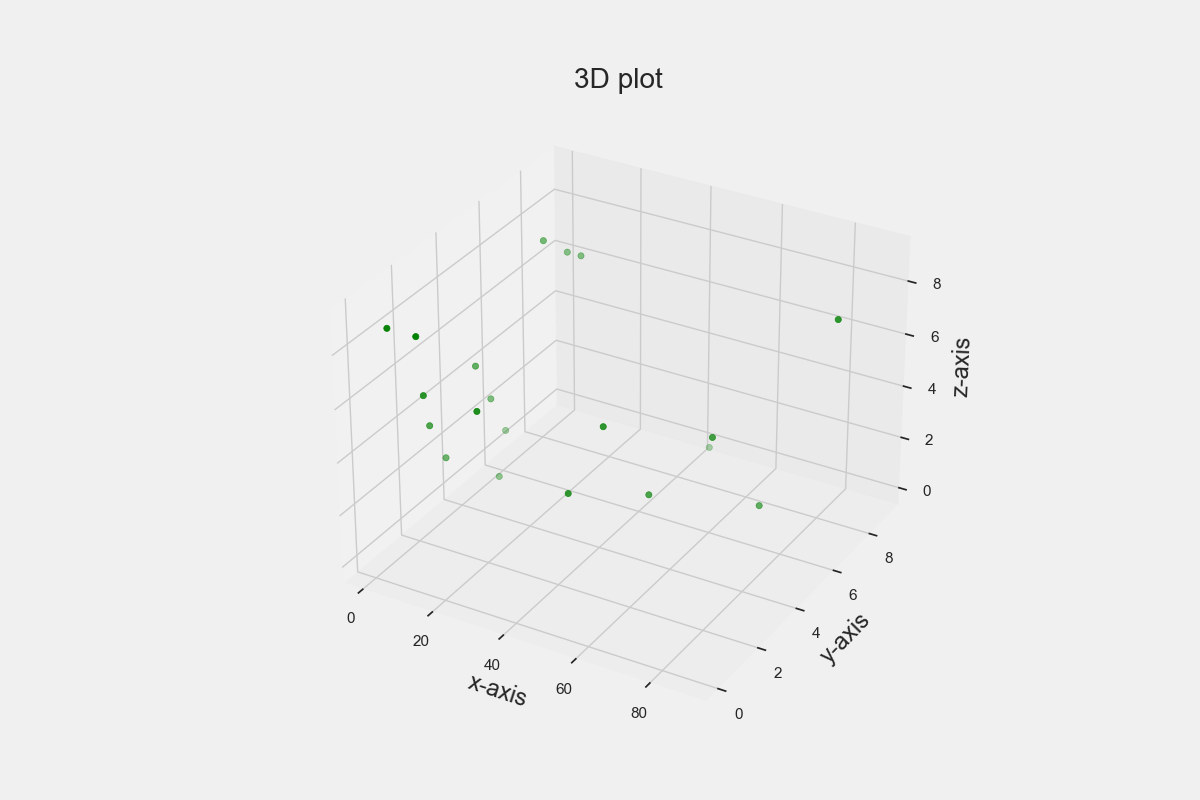

In [50]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating random dataset
xs = [14, 24, 43, 47, 54, 66, 74, 89, 12,
      44, 1, 2, 3, 4, 5, 9, 8, 7, 6, 5]
  
ys = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 3,
      5, 2, 4, 1, 8, 7, 0, 5]
  
zs = [9, 6, 3, 5, 2, 4, 1, 8, 7, 0, 1, 2, 
      3, 4, 5, 6, 7, 8, 9, 0]
  
# creating figure
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
  
# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color='green')
  
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
  
# displaying the plot
#plt.show()